In [ ]:
import pandas as pd
import re

# Read the Excel file into a DataFrame using 'latin1' encoding
df = pd.read_excel('laptop_price.xlsx',header=0,index_col=0)

# Assuming 'index_position' is the position of the column you want to delete
columns_to_delete = ["laptop_ID", "Product", "TypeName","OpSys","Gpu"]
for column in columns_to_delete:
    if column in df.columns:
        del df[column]

AF=df
# Display the first 10 rows

print(df)
df = df[df['Cpu'].str.contains(r'Intel Core i', regex=True)]
df = df[df['Memory'].apply(lambda x: len(x.split()) <= 2)]

df =df.head(500)




          Company  Inches                            ScreenResolution  \
laptop_ID                                                               
1           Apple    13.3          IPS Panel Retina Display 2560x1600   
2           Apple    13.3                                    1440x900   
3              HP    15.6                           Full HD 1920x1080   
4           Apple    15.4          IPS Panel Retina Display 2880x1800   
5           Apple    13.3          IPS Panel Retina Display 2560x1600   
...           ...     ...                                         ...   
1316       Lenovo    14.0   IPS Panel Full HD / Touchscreen 1920x1080   
1317       Lenovo    13.3  IPS Panel Quad HD+ / Touchscreen 3200x1800   
1318       Lenovo    14.0                                    1366x768   
1319           HP    15.6                                    1366x768   
1320         Asus    15.6                                    1366x768   

                                            Cpu   

In [ ]:

pattern = r'(\d+)x(\d+)'
df['Height'] = df['ScreenResolution'].str.extract(pattern)[0].astype(int)
df['Length'] = df['ScreenResolution'].str.extract(pattern)[1].astype(int)
df['ScreenResolution_Product'] = df['Height'] * df['Length']
del df["Length"]
del df["Height"]
# Dropping the original ScreenResolution column
df.drop(columns=['ScreenResolution'], inplace=True)
df['powerCpu'] = df['Cpu'].str.split(' ').str[-1].str.replace('GHz', '')
df['powerCpu'] = df['powerCpu'].astype(float)
df['Model'] = df['Cpu'].str.split(' ').str[2].str.replace('i', '')
df['Model'] = df['Model'].astype(float)
df['powerCpu'] = df['powerCpu']*df['Model']
df['Cpu_Generation'] = df['Cpu'].str.extract(r'Intel Core i\d+ (\d+)', expand=False).fillna(4)
df['Cpu_Generation'] = df['Cpu_Generation'].astype(int)
df.loc[df['Cpu_Generation'] < 1000, 'Cpu_Generation'] = 7250
df['powerCpu'] = df['powerCpu']*df['Model']*df['Cpu_Generation']
del df["Model"]
del df["Cpu"]
del df["Cpu_Generation"]


df['Ram'] = df['Ram'].str.replace('GB', '')
df['Ram'] = df['Ram'].astype(int)
df['Weight'] = df['Weight'].str.replace('kg', '')
df['Weight'] = df['Weight'].astype(float)

df['Memory_size'] = df['Memory'].str.extract(r'(\d+)').astype(int)
df.loc[df['Memory'].str.contains('TB'), 'Memory_size'] *= 1024
df['Memory_Type'] = df['Memory'].str.split(' ').str[1]
df.loc[df['Memory_Type'] == 'HDD', 'Memory_size'] *= 1
df.loc[df['Memory_Type'] == 'SSD', 'Memory_size'] *= 1
del df["Memory"]


df.rename(columns={'ScreenResolution_Product': 'ScreenResolution'}, inplace=True)
# Extracting only numbers from Weight column
print(df)


          Company  Inches  Ram  Weight  Price_euros  ScreenResolution  \
laptop_ID                                                               
1           Apple    13.3    8    1.37      1339.69           4096000   
3              HP    15.6    8    1.86       575.00           2073600   
4           Apple    15.4   16    1.83      2537.45           5184000   
5           Apple    13.3    8    1.37      1803.60           4096000   
9            Asus    14.0   16    1.30      1495.00           2073600   
...           ...     ...  ...     ...          ...               ...   
743        Lenovo    15.6    4    1.85       779.00           2073600   
744            HP    15.6   16    2.60      2419.00           2073600   
745          Dell    13.3    8    1.55       659.00           2073600   
747          Acer    15.6    4    2.40       410.80           1049088   
749          Dell    15.6    8    2.00       665.00           1049088   

            powerCpu  Memory_size Memory_Type  
la

             Ram                                                    
           count       mean        std   min   25%   50%   75%   max
Company                                                             
Acer        48.0   6.583333   2.640385   4.0   4.0   8.0   8.0  16.0
Apple       10.0  10.400000   3.864367   8.0   8.0   8.0  14.0  16.0
Asus        43.0   9.581395   5.581571   4.0   8.0   8.0   8.0  32.0
Dell       130.0   8.600000   3.973946   4.0   8.0   8.0   8.0  32.0
Fujitsu      2.0   8.000000   0.000000   8.0   8.0   8.0   8.0   8.0
Google       2.0  12.000000   5.656854   8.0  10.0  12.0  14.0  16.0
HP         102.0   7.372549   2.883622   4.0   4.0   8.0   8.0  16.0
Huawei       2.0   8.000000   0.000000   8.0   8.0   8.0   8.0   8.0
LG           1.0   8.000000        NaN   8.0   8.0   8.0   8.0   8.0
Lenovo     126.0   8.079365   3.798111   4.0   4.0   8.0   8.0  24.0
MSI          3.0   8.000000   0.000000   8.0   8.0   8.0   8.0   8.0
Microsoft    5.0   8.800000   4.38

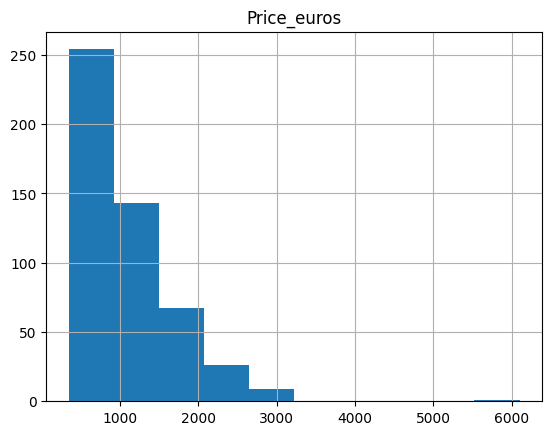

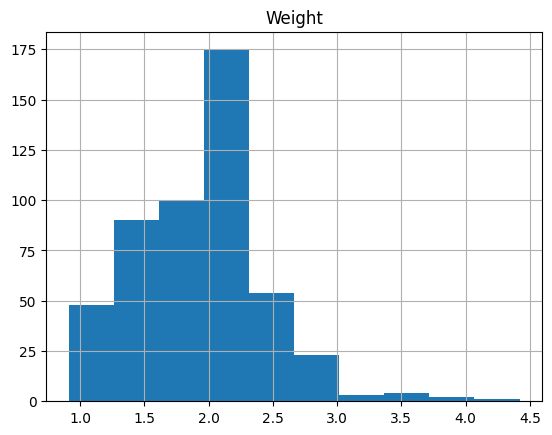

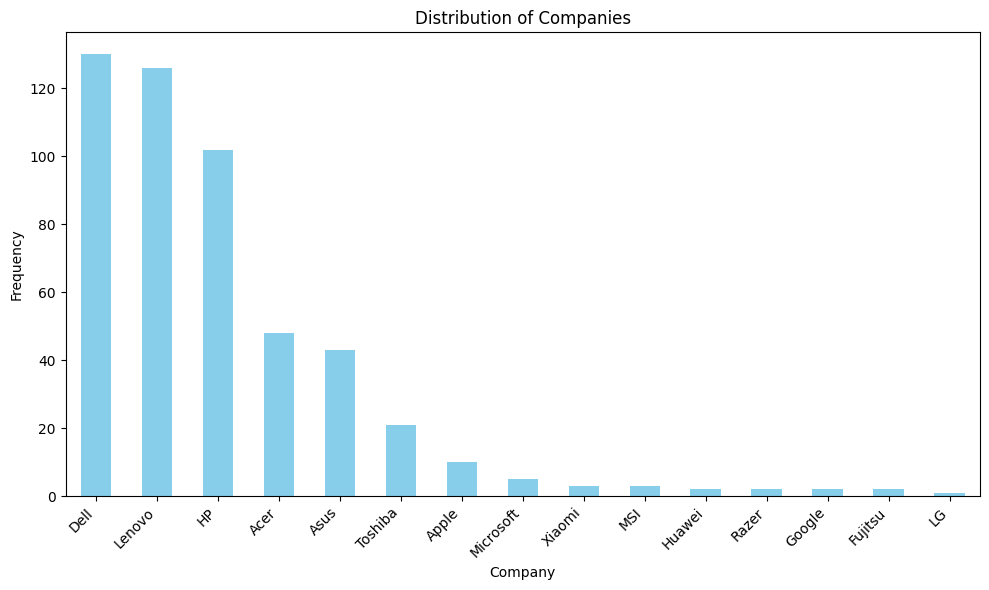

<Figure size 1000x600 with 0 Axes>

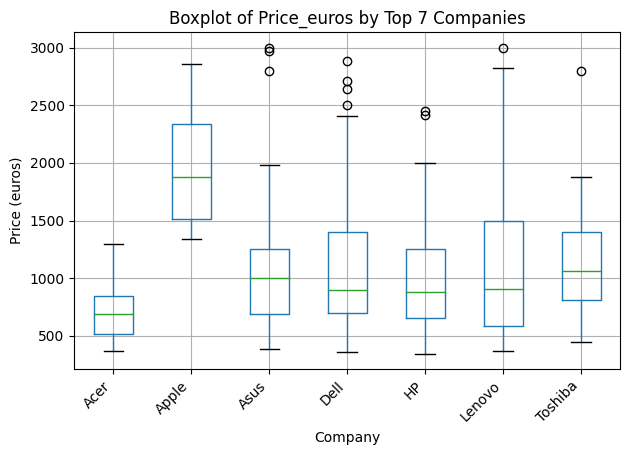

In [ ]:
#importation de la librairie
import matplotlib.pyplot as plt
#histogramme d'une variable
df.hist(column='Price_euros')
df.hist(column='Weight')


esp = df.groupby('Company')
print(esp[['Ram']].describe())
company_counts = df['Company'].value_counts()

# Plot bar plot
plt.figure(figsize=(10, 6))
company_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Companies')
plt.xlabel('Company')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
top_7_companies = df['Company'].value_counts().nlargest(7).index

# Filter the DataFrame for the top 4 most frequent companies
df_filtered = df[df['Company'].isin(top_7_companies)]

# Plot the boxplot
plt.figure(figsize=(10, 6))
df_filtered.boxplot(column='Price_euros', by='Company')
plt.title('Boxplot of Price_euros by Top 7 Companies')
plt.suptitle('')  # Remove automatically generated title
plt.xlabel('Company')
plt.ylabel('Price (euros)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



In [ ]:



X = df.drop(['Company', 'Memory_Type'], axis=1)
print(X)

#matrice de corrélation entre les variables
X.corr()

           Inches  Ram  Weight  Price_euros  ScreenResolution   powerCpu  \
laptop_ID                                                                  
1            13.3    8    1.37      1339.69           4096000   416875.0   
3            15.6    8    1.86       575.00           2073600   450000.0   
4            15.4   16    1.83      2537.45           5184000   959175.0   
5            13.3    8    1.37      1803.60           4096000   561875.0   
9            14.0   16    1.30      1495.00           2073600   754110.0   
...           ...  ...     ...          ...               ...        ...   
743          15.6    4    1.85       779.00           2073600   992250.0   
744          15.6   16    2.60      2419.00           2073600  1056440.0   
745          13.3    8    1.55       659.00           2073600   330000.0   
747          15.6    4    2.40       410.80           1049088   108108.0   
749          15.6    8    2.00       665.00           1049088   108108.0   

           

,Inches,Ram,Weight,Price_euros,ScreenResolution,powerCpu,Memory_size
Inches,1.000000,-0.064698,0.867201,-0.208620,-0.221141,-0.034520,0.344026
Ram,-0.064698,1.000000,-0.017116,0.724171,0.411646,0.554049,0.023940
Weight,0.867201,-0.017116,1.000000,-0.163809,-0.230377,0.001507,0.330086
Price_euros,-0.208620,0.724171,-0.163809,1.000000,0.569342,0.621511,-0.159825
ScreenResolution,-0.221141,0.411646,-0.230377,0.569342,1.000000,0.301030,-0.064113
powerCpu,-0.034520,0.554049,0.001507,0.621511,0.301030,1.000000,-0.042536
Memory_size,0.344026,0.023940,0.330086,-0.159825,-0.064113,-0.042536,1.000000


In [ ]:
#scikit-learn
import sklearn
import numpy as np
#classe StandardScaler pour standardisation (centrage et reduction)
from sklearn.preprocessing import StandardScaler
#instanciation
sc = StandardScaler()
#transformation – centrage-réduction
Z = sc.fit_transform(X)

correlation_matrix = np.corrcoef(Z, rowvar=False)
eig_vals, eig_vecs = np.linalg.eig(correlation_matrix )
print(eig_vals)
print(eig_vecs)

# Print correlation matrix
print(correlation_matrix)

[2.79507638 1.95319814 0.82828537 0.64858822 0.13004352 0.43104829
 0.21376008]
[[ 0.30659675 -0.5544683   0.19966751  0.24388333  0.70574166 -0.02731503
   0.01999353]
 [-0.43925015 -0.32095838 -0.02331078 -0.17682289  0.0182591   0.66160096
   0.48392775]
 [ 0.28510648 -0.57084844  0.23656444  0.19423649 -0.70355834  0.03269612
  -0.05560955]
 [-0.52268782 -0.20315243  0.07550355  0.04117477  0.06075961  0.15614984
  -0.80626043]
 [-0.41351715 -0.0658247  -0.34363459  0.7541667  -0.05306792 -0.28509408
   0.23178374]
 [-0.39571822 -0.30484236  0.23129984 -0.45421448 -0.00773251 -0.67088483
   0.20129968]
 [ 0.17601171 -0.35376548 -0.85225679 -0.30782009 -0.00576566 -0.06871065
  -0.13424095]]
[[ 1.         -0.06469759  0.86720089 -0.20862    -0.22114093 -0.03452019
   0.34402599]
 [-0.06469759  1.         -0.01711615  0.72417115  0.41164593  0.55404892
   0.02394027]
 [ 0.86720089 -0.01711615  1.         -0.1638088  -0.23037735  0.00150679
   0.33008644]
 [-0.20862     0.72417115 -0.

[[ 1.52835250e+00 -1.80307410e+00  2.25575290e-01 ... -8.00935803e-05
  -5.53518733e-02  2.42344340e-01]
 [-6.33274072e-01 -3.90706812e-01 -5.50822786e-01 ...  1.34591084e-01
  -6.48508700e-01 -4.29798672e-01]
 [ 3.41506436e+00  1.62476472e+00  3.43060507e-01 ...  1.39386760e-01
   1.85706414e-01 -4.39566065e-01]
 ...
 [-3.12990049e-01 -1.15193871e+00  1.81341540e+00 ...  2.93399356e-01
  -1.83369169e-01  4.88719387e-01]
 [-2.35574753e+00 -2.87163261e-01 -2.70295893e-01 ...  3.69580067e-01
   1.48039846e-01  3.07539976e-01]
 [-1.37539773e+00 -5.75698877e-01 -6.52062461e-01 ...  1.09445597e+00
  -1.23749257e-01 -2.93880206e-01]]


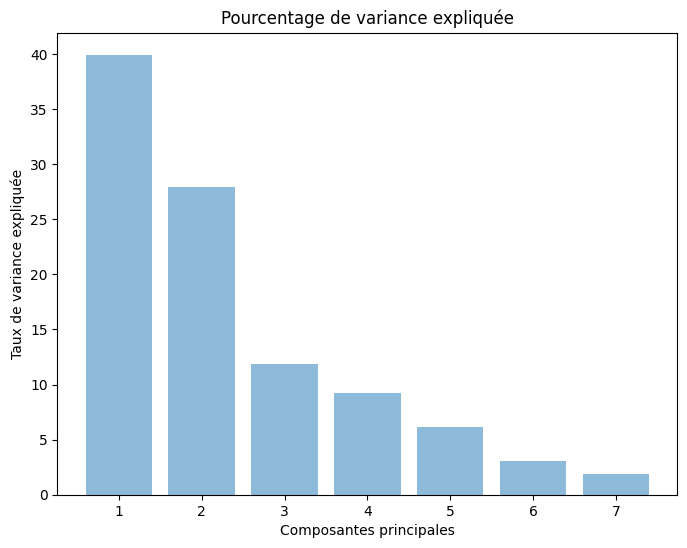

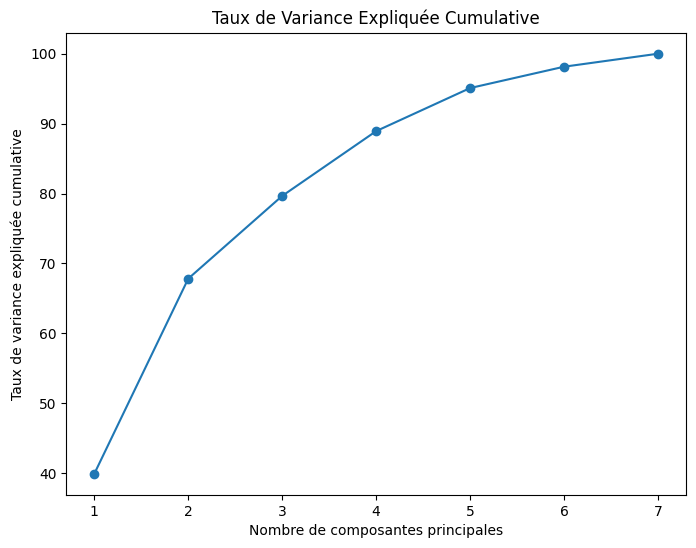

In [ ]:
from sklearn.decomposition import PCA
colonnes_numeriques = df.select_dtypes(include=['int', 'float'])

# Standardiser les données
scaler = StandardScaler()
colonnes_numeriques_standardisees = scaler.fit_transform(colonnes_numeriques)

# Effectuer l'ACP
pca = PCA()
composantes_principales = pca.fit_transform(colonnes_numeriques_standardisees)
print(composantes_principales)

# Taux de variance expliquée
taux_variance_expliquee = pca.explained_variance_ratio_*100

# Tracer le taux de variance expliquée
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(taux_variance_expliquee) + 1), taux_variance_expliquee, alpha=0.5, align='center')
plt.ylabel('Taux de variance expliquée')
plt.xlabel('Composantes principales')
plt.title('Pourcentage de variance expliquée')
plt.show()

# Optionnellement, vous pouvez également examiner le taux de variance expliquée cumulatif
taux_variance_expliquee_cumulative = taux_variance_expliquee.cumsum()
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(taux_variance_expliquee_cumulative) + 1), taux_variance_expliquee_cumulative, marker='o')
plt.ylabel('Taux de variance expliquée cumulative')
plt.xlabel('Nombre de composantes principales')
plt.title('Taux de Variance Expliquée Cumulative')
plt.show()


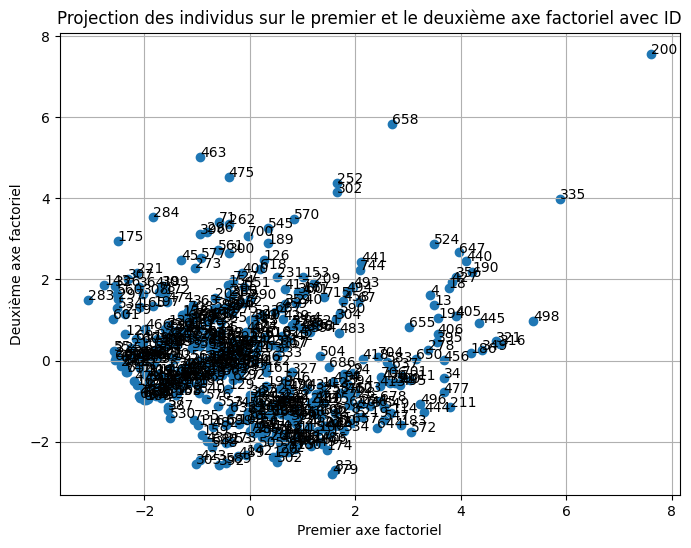

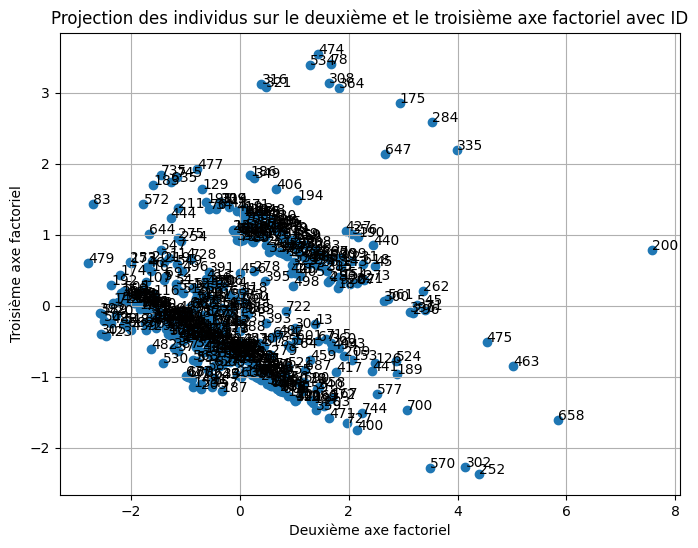

In [ ]:

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Effectuer l'ACP
pca = PCA()
composantes_principales = pca.fit_transform(colonnes_numeriques_standardisees)

# Extraire les coordonnées des individus sur les deux premiers axes factoriels
individus_proj_1_2 = composantes_principales[:, :2]
individus_proj_2_3 = composantes_principales[:, 1:3]

# Obtenir les identifiants des individus
ids_individus = df.index

# Tracer la projection des individus sur le premier et le deuxième axe factoriel avec ID
plt.figure(figsize=(8, 6))
plt.scatter(individus_proj_1_2[:, 0], individus_proj_1_2[:, 1])
for i, id_individu in enumerate(ids_individus):
    plt.text(individus_proj_1_2[i, 0], individus_proj_1_2[i, 1], str(id_individu))
plt.xlabel('Premier axe factoriel')
plt.ylabel('Deuxième axe factoriel')
plt.title('Projection des individus sur le premier et le deuxième axe factoriel avec ID')
plt.grid(True)
plt.show()

# Tracer la projection des individus sur le deuxième et le troisième axe factoriel avec ID
plt.figure(figsize=(8, 6))
plt.scatter(individus_proj_2_3[:, 0], individus_proj_2_3[:, 1])
for i, id_individu in enumerate(ids_individus):
    plt.text(individus_proj_2_3[i, 0], individus_proj_2_3[i, 1], str(id_individu))
plt.xlabel('Deuxième axe factoriel')
plt.ylabel('Troisième axe factoriel')
plt.title('Projection des individus sur le deuxième et le troisième axe factoriel avec ID')
plt.grid(True)
plt.show()

    valprop    inertie  inertiecum
0  2.800678  39.929663   39.929663
1  1.957112  27.902831   67.832493
2  0.829945  11.832648   79.665141
3  0.649888   9.265546   88.930687
4  0.431912   6.157833   95.088520
5  0.214188   3.053715   98.142235
6  0.130304   1.857765  100.000000
      ID   Contr_1   Contr_2   Contr_3   Coscar_1   Coscar_2   Coscar_3
0      1  0.166807  0.332232  0.012262  34.195348  47.593442   0.744909
1      3  0.028639  0.015600  0.073115  24.997994   9.515327  18.912352
2      4  0.832846  0.269771  0.028361  74.900578  16.953850   0.755838
3      5  0.295503  0.198446  0.031214  57.769278  27.110013   1.808273
4      9  0.275269  0.009539  0.018963  58.217021   1.409811   1.188461
..   ...       ...       ...       ...        ...        ...        ...
495  743  0.024533  0.036032  0.147995   6.630210   6.804939  11.852724
496  744  0.312300  0.511096  0.546824  34.417853  39.361081  17.858538
497  745  0.006996  0.135604  0.792456   1.762955  23.880251  59.179970


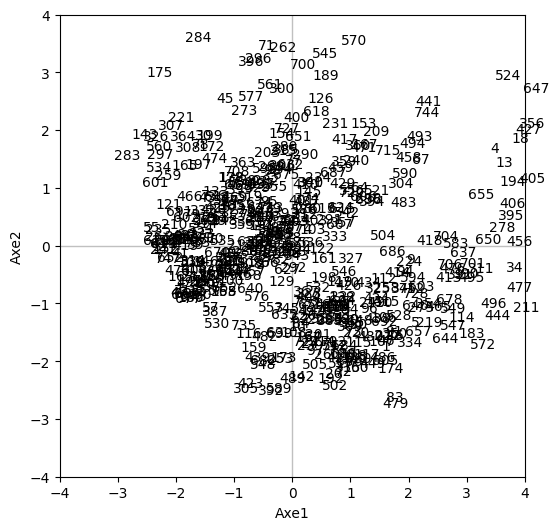

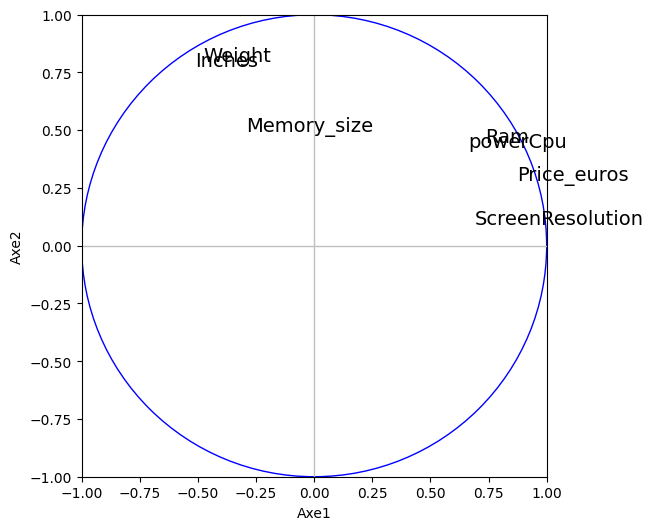

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Calcul des contributions des individus dans l'inertie sur Axe1, Axe2 et Axe3
Z = sc.fit_transform(colonnes_numeriques)
coord = pca.fit_transform(Z)
valprop = pca.explained_variance_
inert = pca.explained_variance_ratio_ * 100
cuminert = np.cumsum(pca.explained_variance_ratio_) * 100
print(pd.DataFrame({'valprop': valprop, 'inertie': inert, 'inertiecum': cuminert}))

A = coord**2
n = 500
Ctr1 = (A[:,0] / (n * valprop[0])) * 100
Ctr2 = (A[:,1] / (n * valprop[1])) * 100
Ctr3 = (A[:,2] / (n * valprop[2])) * 100

# Calcul de la qualité de représentation des individus sur Axe1, Axe2 et Axe3
normind = np.sum(Z**2, axis=1)
Cos1 = (A[:,0] / normind) * 100
Cos2 = (A[:,1] / normind) * 100
Cos3 = (A[:,2] / normind) * 100

# Calcul des contributions des variables dans l'inertie sur Axe1, Axe2 et Axe3
sqrt_eigval = np.sqrt(valprop)
corvar1 = pca.components_[0,:] * sqrt_eigval[0]
corvar2 = pca.components_[1,:] * sqrt_eigval[1]
corvar3 = pca.components_[2,:] * sqrt_eigval[2]

Ctrvar1 = (corvar1**2) / (valprop[0]) * 100
Ctrvar2 = (corvar2**2) / (valprop[1]) * 100
Ctrvar3 = (corvar3**2) / (valprop[2]) * 100

# Calcul de la qualité de représentation des variables sur Axe1, Axe2 et Axe3
Cosvar1 = (corvar1**2) * 100
Cosvar2 = (corvar2**2) * 100
Cosvar3 = (corvar3**2) * 100

# Affichage des contributions des individus dans l'inertie et leur qualité de représentation
print(pd.DataFrame({'ID': X.index, 'Contr_1': Ctr1, 'Contr_2': Ctr2, 'Contr_3': Ctr3, 'Coscar_1': Cos1, 'Coscar_2': Cos2, 'Coscar_3': Cos3}))

# Affichage des contributions des variables dans l'inertie et leur qualité de représentation
print(pd.DataFrame({'ID': X.columns, 'corvar1': corvar1, 'corvar2': corvar2, 'corvar3': corvar3, 'Ctrvar1': Ctrvar1, 'Ctrvar2': Ctrvar2, 'Ctrvar3': Ctrvar3, 'Cosvar1': Cosvar1, 'Cosvar2': Cosvar2, 'Cosvar3': Cosvar3}))

# Positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(6,6))
axes.set_xlim(-4, 4)  # Même limites en abscisse
axes.set_ylim(-4, 4)  # et en ordonnée
# Placement des étiquettes des observations
for i in range(len(ids_individus)):
    plt.annotate(colonnes_numeriques.index[i], (coord[i,0], coord[i,1]))
# Ajout des axes
plt.plot([-4, 4], [0, 0], color='silver', linestyle='-', linewidth=1)
plt.plot([0, 0], [-4, 4], color='silver', linestyle='-', linewidth=1)
plt.xlabel('Axe1')
plt.ylabel('Axe2')
# Affichage
plt.show()

# Cercle des corrélations pour les variables projetées sur Axe1 et Axe2
fig, axes = plt.subplots(figsize=(6,6))
axes.set_xlim(-1, 1)
axes.set_ylim(-1, 1)
# Affichage des étiquettes (noms des variables)
for j in range(7):
    plt.annotate(colonnes_numeriques.columns[j], (corvar1[j], corvar2[j]), fontsize=14)
# Ajout des axes
plt.plot([-1, 1], [0, 0], color='silver', linestyle='-', linewidth=1)
plt.plot([0, 0], [-1, 1], color='silver', linestyle='-', linewidth=1)
# Ajout d'un cercle
cercle = plt.Circle((0,0), 1, color='blue', fill=False)
axes.add_artist(cercle)
plt.xlabel('Axe1')
plt.ylabel('Axe2')
# Affichage
plt.show()


    valprop    inertie  inertiecum
0  2.800678  39.929663   39.929663
1  1.957112  27.902831   67.832493
2  0.829945  11.832648   79.665141
3  0.649888   9.265546   88.930687
4  0.431912   6.157833   95.088520
5  0.214188   3.053715   98.142235
6  0.130304   1.857765  100.000000
      ID   Contr_2   Contr_3   Coscar_2   Coscar_3
0      1  0.332232  0.012262  47.593442   0.744909
1      3  0.015600  0.073115   9.515327  18.912352
2      4  0.269771  0.028361  16.953850   0.755838
3      5  0.198446  0.031214  27.110013   1.808273
4      9  0.009539  0.018963   1.409811   1.188461
..   ...       ...       ...        ...        ...
495  743  0.036032  0.147995   6.804939  11.852724
496  744  0.511096  0.546824  39.361081  17.858538
497  745  0.135604  0.792456  23.880251  59.179970
498  747  0.008427  0.017606   1.346775   1.193208
499  749  0.033869  0.102461   8.207587  10.529388

[500 rows x 5 columns]
                 ID   corvar2   corvar3    Ctrvar2    Ctrvar3    Cosvar2  \
0       

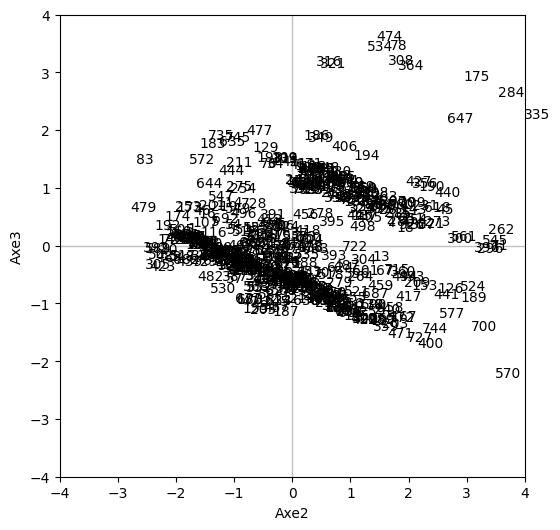

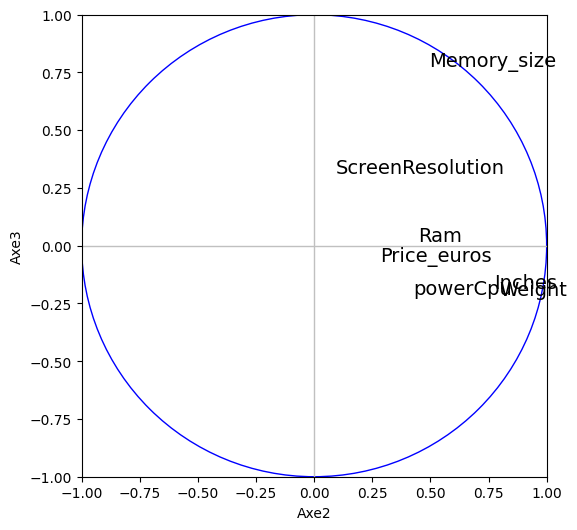

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Calcul des contributions des individus dans l'inertie sur Axe2 et Axe3
Z = sc.fit_transform(colonnes_numeriques)
coord = pca.fit_transform(Z)
valprop = pca.explained_variance_
inert = pca.explained_variance_ratio_ * 100
cuminert = np.cumsum(pca.explained_variance_ratio_) * 100
print(pd.DataFrame({'valprop': valprop, 'inertie': inert, 'inertiecum': cuminert}))

A = coord**2
n = 500
Ctr2 = (A[:,1] / (n * valprop[1])) * 100
Ctr3 = (A[:,2] / (n * valprop[2])) * 100

# Calcul de la qualité de représentation des individus sur Axe2 et Axe3
normind = np.sum(Z**2, axis=1)
Cos2 = (A[:,1] / normind) * 100
Cos3 = (A[:,2] / normind) * 100

# Calcul des contributions des variables dans l'inertie sur Axe2 et Axe3
sqrt_eigval = np.sqrt(valprop)
corvar2 = pca.components_[1,:] * sqrt_eigval[1]
corvar3 = pca.components_[2,:] * sqrt_eigval[2]

Ctrvar2 = (corvar2**2) / (valprop[1]) * 100
Ctrvar3 = (corvar3**2) / (valprop[2]) * 100

# Calcul de la qualité de représentation des variables sur Axe2 et Axe3
Cosvar2 = (corvar2**2) * 100
Cosvar3 = (corvar3**2) * 100

# Affichage des contributions des individus dans l'inertie et leur qualité de représentation
print(pd.DataFrame({'ID': X.index, 'Contr_2': Ctr2, 'Contr_3': Ctr3, 'Coscar_2': Cos2, 'Coscar_3': Cos3}))

# Affichage des contributions des variables dans l'inertie et leur qualité de représentation
print(pd.DataFrame({'ID': X.columns, 'corvar2': corvar2, 'corvar3': corvar3, 'Ctrvar2': Ctrvar2, 'Ctrvar3': Ctrvar3, 'Cosvar2': Cosvar2, 'Cosvar3': Cosvar3}))

# Positionnement des individus dans le plan défini par Axe2 et Axe3
fig, axes = plt.subplots(figsize=(6,6))
axes.set_xlim(-4, 4)  # Même limites en abscisse
axes.set_ylim(-4, 4)  # et en ordonnée
# Placement des étiquettes des observations
for i in range(len(ids_individus)):
    plt.annotate(colonnes_numeriques.index[i], (coord[i,1], coord[i,2]))
# Ajout des axes
plt.plot([-4, 4], [0, 0], color='silver', linestyle='-', linewidth=1)
plt.plot([0, 0], [-4, 4], color='silver', linestyle='-', linewidth=1)
plt.xlabel('Axe2')
plt.ylabel('Axe3')
# Affichage
plt.show()

# Cercle des corrélations pour les variables projetées sur Axe2 et Axe3
fig, axes = plt.subplots(figsize=(6,6))
axes.set_xlim(-1, 1)
axes.set_ylim(-1, 1)
# Affichage des étiquettes (noms des variables)
for j in range(7):
    plt.annotate(colonnes_numeriques.columns[j], (corvar2[j], corvar3[j]), fontsize=14)
# Ajout des axes
plt.plot([-1, 1], [0, 0], color='silver', linestyle='-', linewidth=1)
plt.plot([0, 0], [-1, 1], color='silver', linestyle='-', linewidth=1)
# Ajout d'un cercle
cercle = plt.Circle((0,0), 1, color='blue', fill=False)
axes.add_artist(cercle)
plt.xlabel('Axe2')
plt.ylabel('Axe3')
# Affichage
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


    laptop_ID
0         366
0         502
0         498
0         497
0         496
..        ...
2         465
2         456
2          72
2          34
2           1

[500 rows x 1 columns]
[[2223205.89263799 4221180.69147395  325380.22312181]
 [ 218986.53351331 6233958.73674572 2064031.44083605]
 [3333258.7074565  3112149.8290839  1089028.15701731]
 ...
 [ 292002.96399771 6242899.96088927 2084371.67566929]
 [ 935902.94929653 7283690.01142233 3132563.6801456 ]
 [ 935902.86655062 7283689.95351915 3132563.56989098]]
     Classe   ID        DistG1        DistG2        DistG3
0         3    1  2.223206e+06  4.221181e+06  3.253802e+05
1         1    3  2.189865e+05  6.233959e+06  2.064031e+06
2         3    4  3.333259e+06  3.112150e+06  1.089028e+06
3         3    5  2.219545e+06  4.208608e+06  1.809207e+05
4         1    9  2.870140e+05  6.221615e+06  2.043370e+06
..      ...  ...           ...           ...           ...
495       1  743  4.883271e+05  6.222318e+06  2.058650e+06
496   

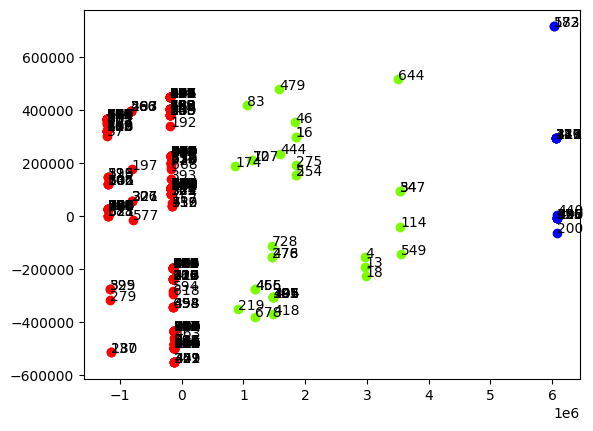

In [ ]:
# k-means clustering
from sklearn.cluster import KMeans

# Assuming your price dataset is named 'price_data'
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

# Sorted index of groups
idk = np.argsort(kmeans.labels_)

# Displaying observations and their groups
Cldf = pd.DataFrame(X.index[idk], kmeans.labels_[idk])
print(Cldf)

# Distances to class centers of observations
A = kmeans.transform(X)
print(A)

# Displaying the class labels and distances
print(pd.DataFrame({'Classe': kmeans.labels_ + 1, 'ID': X.index, 'DistG1': A[:, 0], 'DistG2': A[:, 1], 'DistG3': A[:, 2]}))



# Performing PCA
from sklearn.decomposition import PCA

# Assuming 'price_data' is your dataset
acp = PCA(n_components=2).fit_transform(X)

# Projecting onto the factorial plane with different color codes for each group
import matplotlib.pyplot as plt

colors = ['red', 'blue', 'lawngreen']
for color, k in zip(colors, [0, 1, 2]):
    plt.scatter(acp[kmeans.labels_ == k, 0], acp[kmeans.labels_ == k, 1], c=color)

n = X.shape[0]
# Labeling the points
for i in range(n):
    plt.annotate(X.index[i], (acp[i, 0], acp[i, 1]))
plt.show()
